#                       Mexico's COVID19 Data description and Analisys


<img align="center" src="https://i.imgur.com/ywPyXHY.png">


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import seaborn as sns
from datetime import datetime, timedelta
from collections import OrderedDict

# Data helper modules
from Covid_suite import Covid
from constants import *

In [2]:
database = {'confirmed'   : 'Casos_Diarios_Estado_Nacional_Confirmados_20200604.csv',
            'suspicious'  : 'Casos_Diarios_Estado_Nacional_Sospechosos_20200604.csv',
            'negatives'   : 'Casos_Diarios_Estado_Nacional_Negativos_20200604.csv',
            'deaths'      : 'Casos_Diarios_Estado_Nacional_Defunciones_20200604.csv',
            'patients'    : '200604COVID19MEXICO.csv'}
# Update the database by writing the url of the csv's and running the update_data @classmethod:
# Data comes from: https://coronavirus.gob.mx/datos/#DownZCSV
Covid.update_data(database)

# 1.- Frequencies

## Confirmed, Deaths, Negative and Suspicious in Mexico

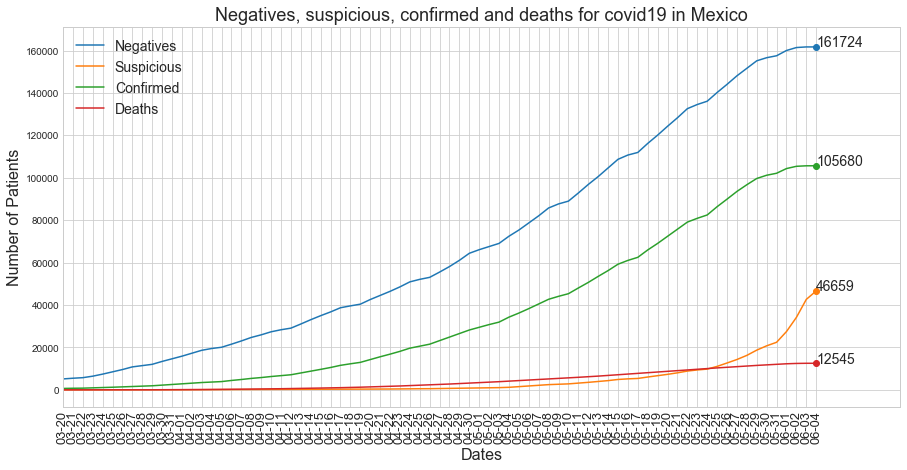

In [3]:
Covid.plot_cummulative(data  = [Covid('all').cummulative('negatives'),
                                Covid('all').cummulative('suspicious'),
                                Covid('all').cummulative('confirmed'),
                                Covid('all').cummulative('deaths')],
                                names = ['Negatives','Suspicious','Confirmed','Deaths'],
                                title = 'Negatives, suspicious, confirmed and deaths for covid19 in Mexico',
                                trim= 80)

## Confirmed and Suspicious by day in Mexico

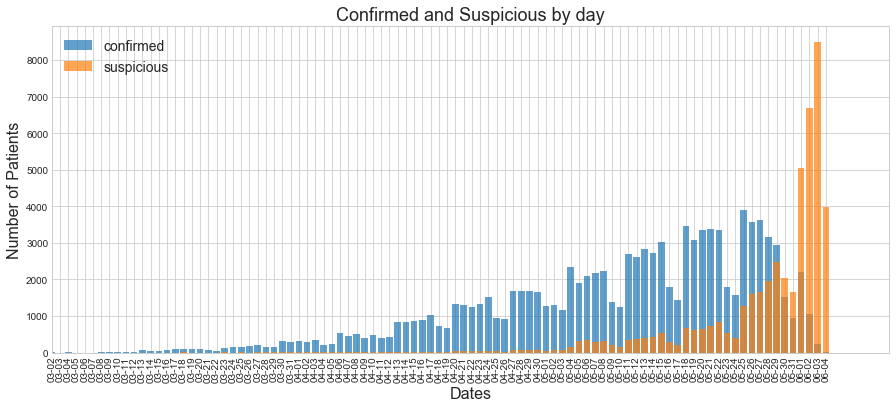

In [4]:
Covid.plot_discrete(data=[Covid('all').discrete('confirmed'),
                          Covid('all').discrete('suspicious')],
                    names=['confirmed','suspicious'],
                    title= 'Confirmed and Suspicious by day',
                    trim = 50)

## Deaths by day in Mexico

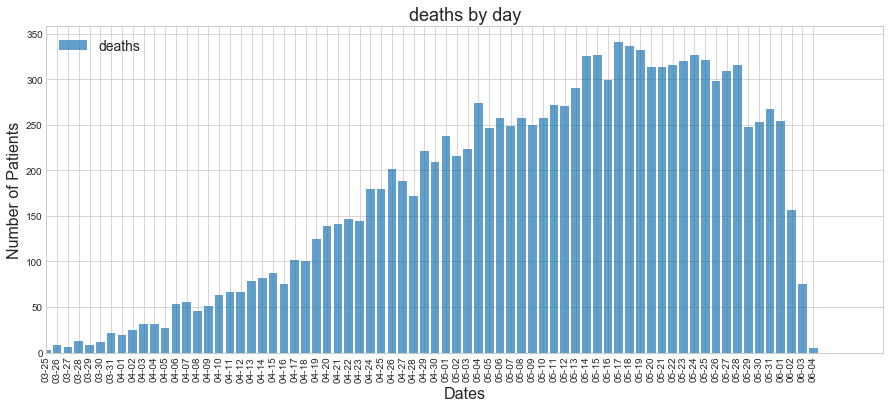

In [5]:
Covid.plot_discrete(data=Covid('all').discrete('deaths'),
                    names='deaths',
                    title= 'deaths by day',
                    trim = 50)

## States with more Confirmed patients

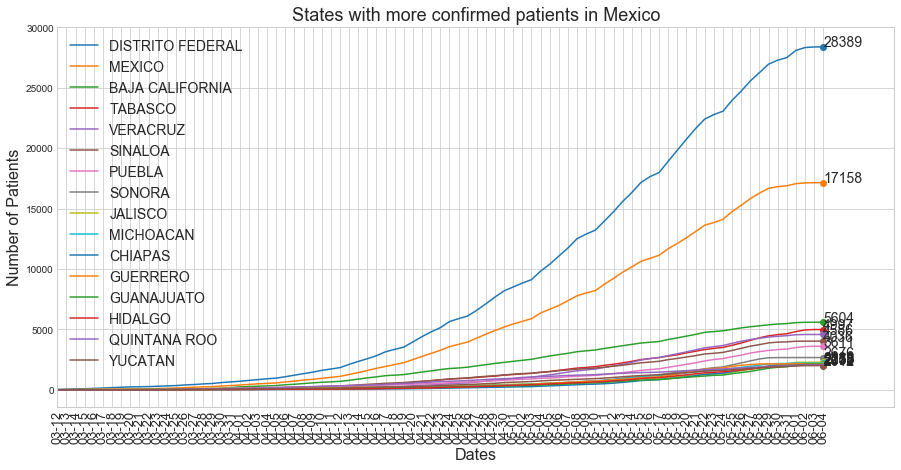

In [6]:
Covid.plot_max_to_min('confirmed',n=16,title='States with more confirmed patients in Mexico',trim=60)

## States with more Deceased patients

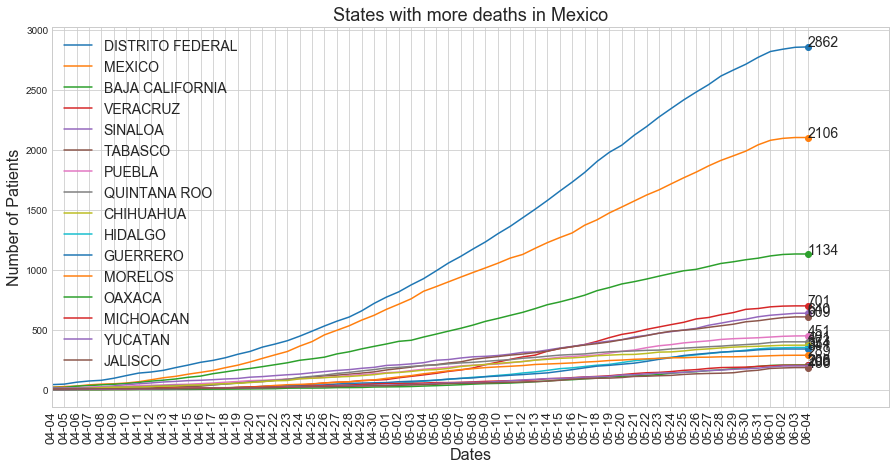

In [7]:
Covid.plot_max_to_min('deaths',n=16,title='States with more deaths in Mexico',trim=60)

## Active Patients in Mexico

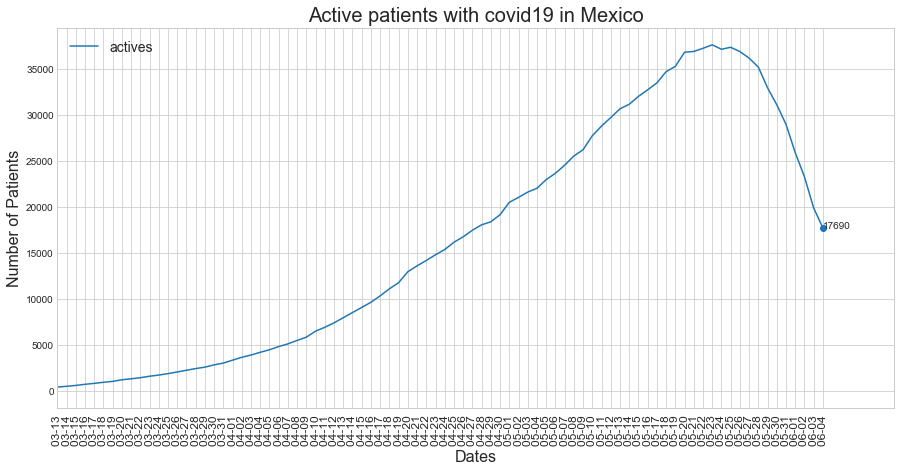

In [8]:
Covid.plot_actives(Covid('all').actives(),
                   names='actives',
                   title='Active patients with covid19 in Mexico',
                   trim=60)

## States with more active patients

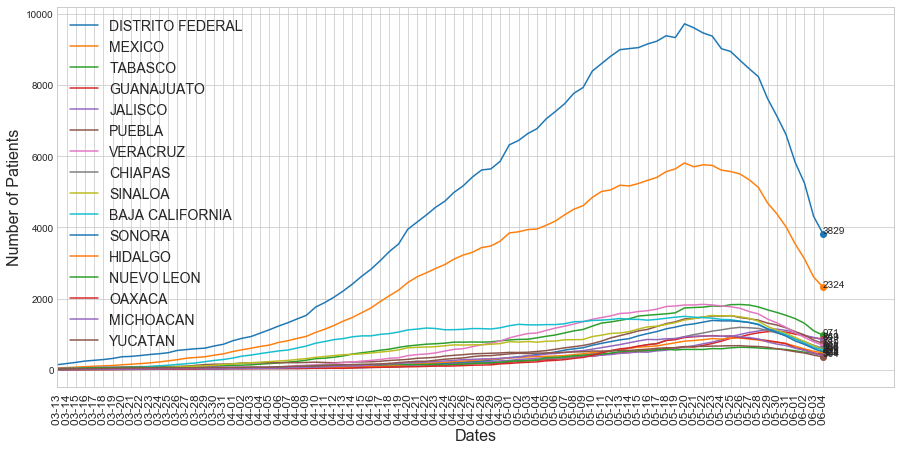

In [9]:
Covid.plot_max_to_min('actives',n=16,trim=60)

## States with less active patients

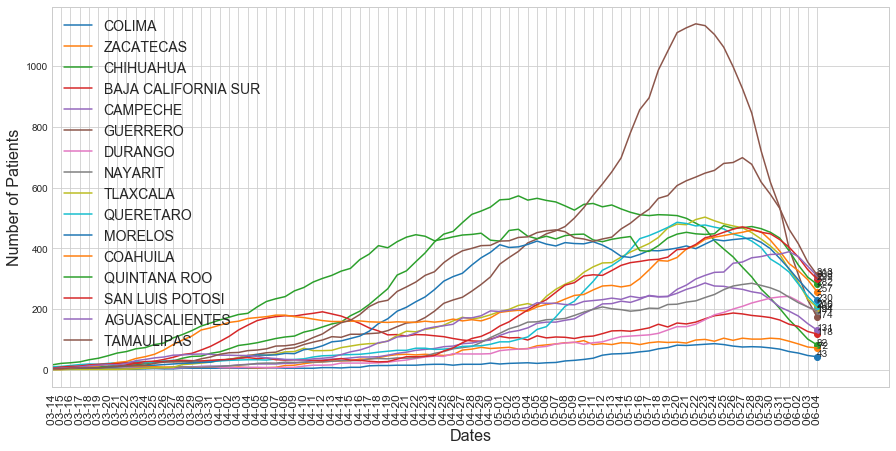

In [10]:
Covid.plot_max_to_min('actives', n=16, trim=60, max_to_min = False)

# 2.- Patients Data

### Institutions from where patients came from:

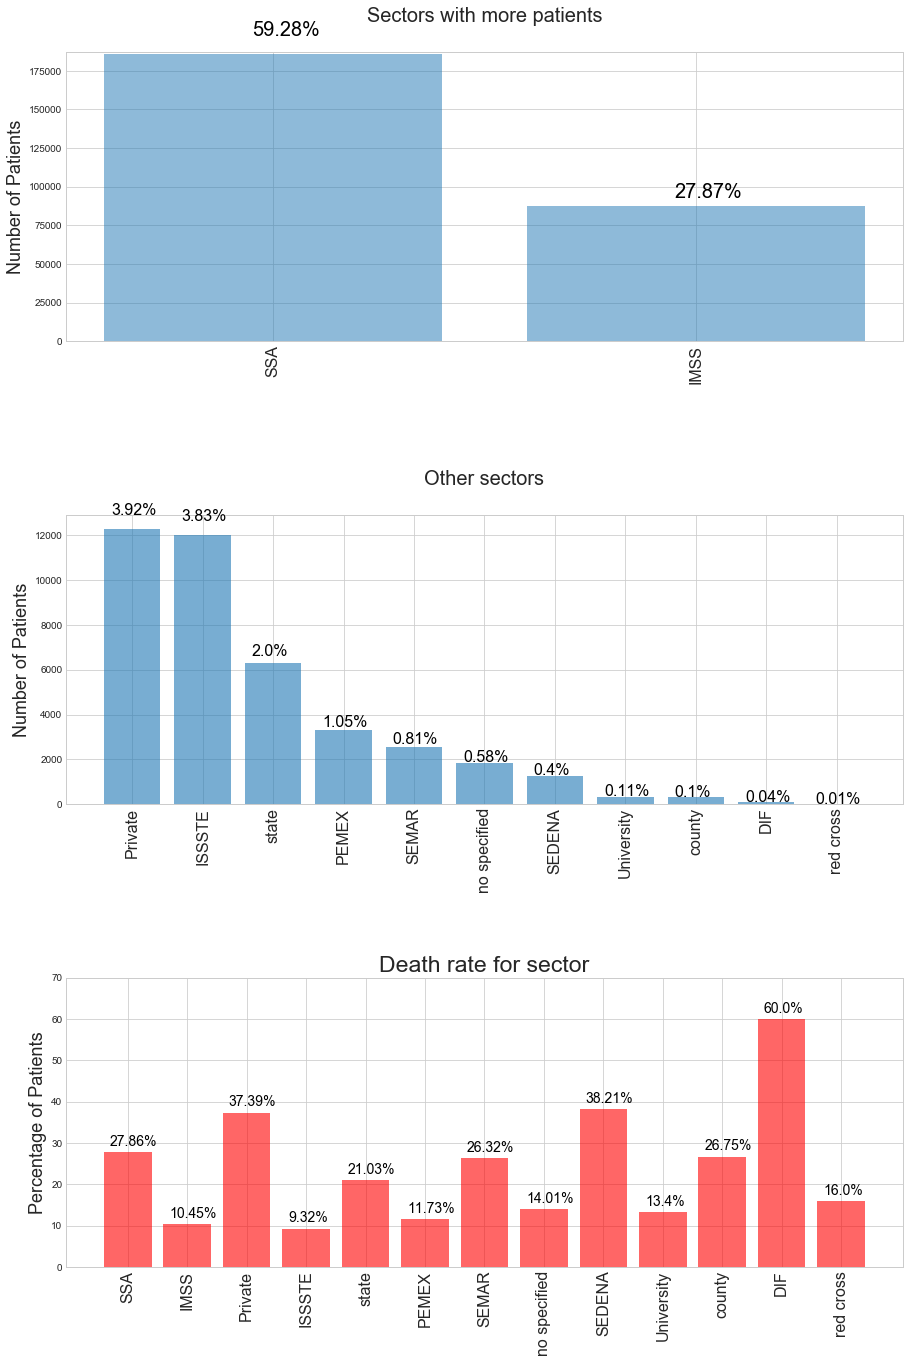

In [11]:
Covid('all').patients().sectors()

## Age for general population

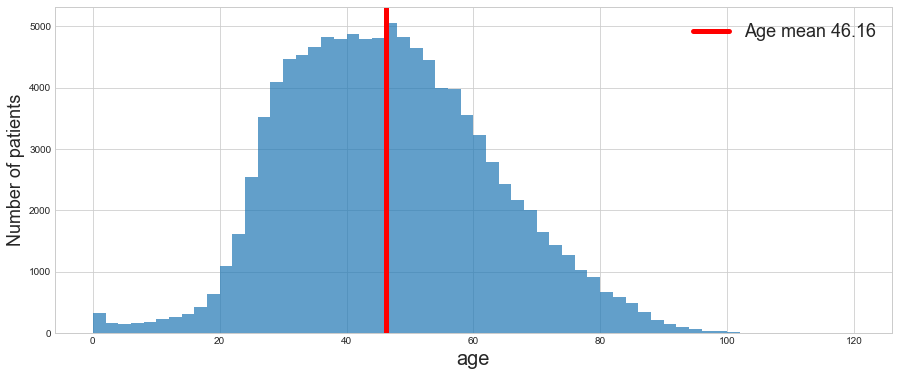

In [12]:
ages = Covid('all').patients().infected().data.age.copy()

plt.close('all')
plt.rcParams["figure.figsize"] = (15,6)
ages.hist(bins=60,alpha=0.7)
plt.axvline(np.mean(ages), 0, 160000, label= f'Age mean {str(np.mean(ages))[:5]}',color= 'r',linewidth = 5)
plt.ylabel('Number of patients',fontsize=18)
plt.xlabel('age',fontsize=20)
plt.legend(fontsize=18)
plt.show()

## Age for dead and alive patients

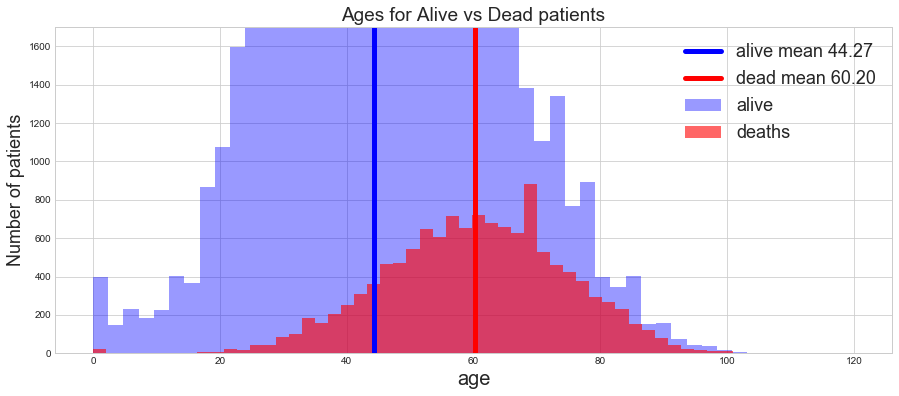

In [13]:
age_deaths = Covid('all').patients().infected().deaths().data.age.copy()
age_alive = Covid('all').patients().infected().alive().data.age.copy()

plt.close('all')
plt.rcParams["figure.figsize"] = (15,6)

age_alive.hist(bins = 50, alpha = 0.4, color = 'b',label='alive')
plt.axvline(np.mean(age_alive), 0, 160000, label= f'alive mean {str(np.mean(age_alive))[:5]}',color= 'b',linewidth = 5)

age_deaths.hist(bins = 50, alpha = 0.6, color = 'r',label='deaths')
plt.axvline(np.mean(age_deaths), 0, 160000, label= f'dead mean {str(np.mean(age_deaths))[:5]}',color= 'r',linewidth = 5)

plt.ylabel('Number of patients',fontsize=18)
plt.xlabel('age',fontsize=20)
plt.ylim(0,1700)
plt.title('Ages for Alive vs Dead patients', fontsize= 19)
plt.legend(fontsize=18)
plt.show()

## Time from onset symptoms to death

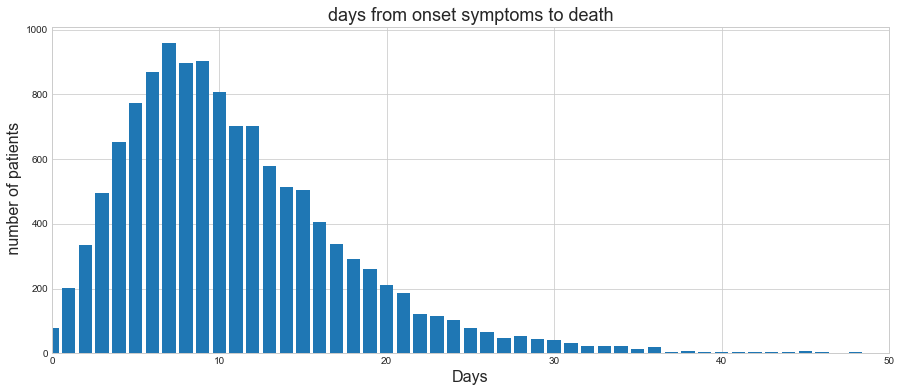

In [14]:
Covid('all').patients().plot_time_to_death()

## Sex frequency for infected patients

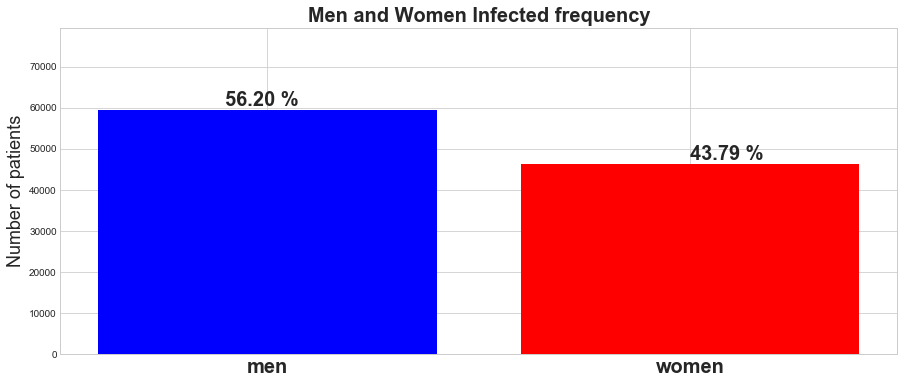

In [15]:
men  = Covid('all').patients().men().infected().data
women= Covid('all').patients().women().infected().data

plt.close('all')
plt.rcParams["figure.figsize"] = (15,6)

plt.bar(['men','women'],[len(men),len(women)],color=['b','r'])

plt.text(1,len(women)+1000,str((len(women)/(len(men)+len(women))*100))[:5]+' %',fontsize=20, fontweight='bold')
plt.text(-0.1,len(men)+1000,str((len(men)/(len(men)+len(women))*100))[:5]+' %',fontsize=20, fontweight='bold')

plt.ylabel('Number of patients', fontsize = 18)
plt.ylim(0,len(men)+20000)
plt.title('Men and Women Infected frequency', fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.show()

##  Ages for Infected Women and Men

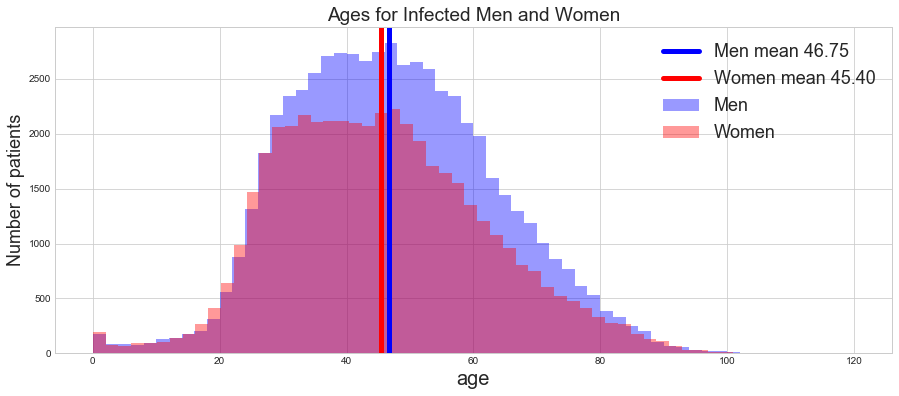

In [16]:
plt.close('all')
plt.rcParams["figure.figsize"] = (15,6)

men.age.hist(bins = 60, alpha = 0.4, color = 'b', label='Men')
plt.axvline(np.mean(men.age), 0, 160000, label= f'Men mean {str(np.mean(men.age))[:5]}',color = 'b', linewidth = 5)

women.age.hist(bins = 50, alpha = 0.4, color = 'r', label='Women')
plt.axvline(np.mean(women.age), 0, 160000, label= f'Women mean {str(np.mean(women.age))[:5]}', color= 'r', linewidth = 5)

plt.ylabel('Number of patients',fontsize=18)
plt.xlabel('age',fontsize=20)
# plt.ylim(0,1700)
plt.title('Ages for Infected Men and Women', fontsize= 19)
plt.legend(fontsize=18)
plt.show()

## Proportions of deaths for men and women

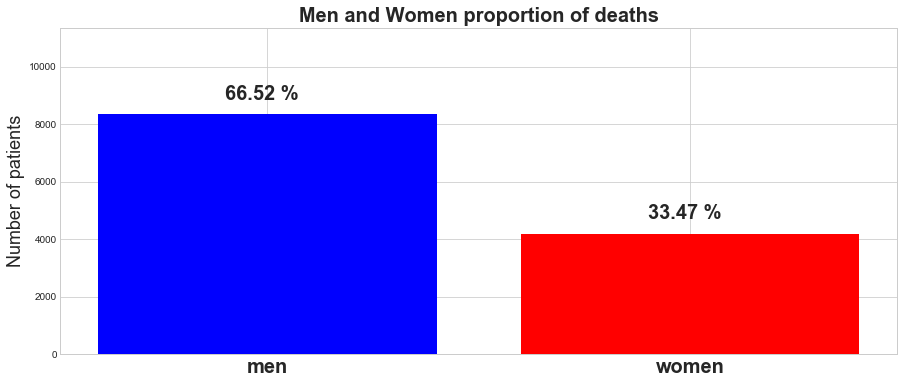

In [17]:
men_deaths = len(Covid('all').patients().men().deaths().infected().data)
women_deaths = len(Covid('all').patients().women().deaths().infected().data)

plt.close('all')
plt.rcParams["figure.figsize"] = (15,6)

plt.bar(['men','women'],[men_deaths,women_deaths], color=['b','r'])

plt.text(0.9,women_deaths+500,str((women_deaths/(women_deaths+men_deaths))*100)[:5]+' %',fontsize=20, fontweight='bold')
plt.text(-0.1,men_deaths+500,str((men_deaths/(women_deaths+men_deaths))*100)[:5]+' %',fontsize=20, fontweight='bold')

plt.ylabel('Number of patients', fontsize = 18)
plt.title('Men and Women proportion of deaths', fontsize=20, fontweight='bold')
plt.ylim(0,max(women_deaths,men_deaths)+ 3000)
plt.xticks(fontsize=20, fontweight='bold')
plt.show()

## Men vs Women Deceased by age

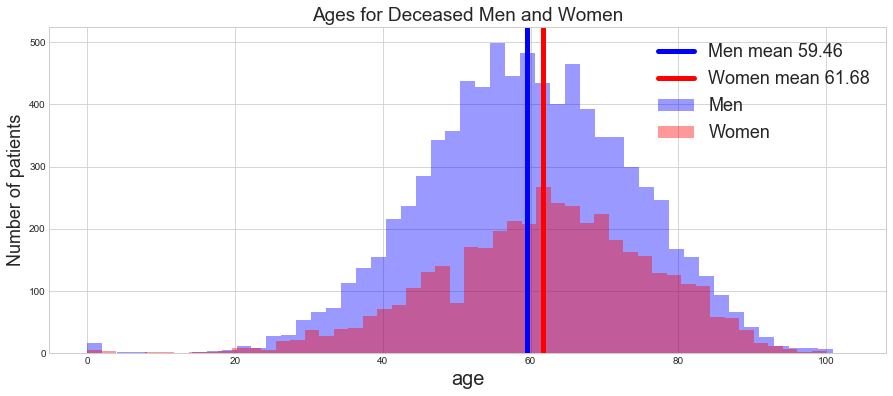

In [18]:
men_deceased_age = Covid('all').patients().men().deaths().infected().data.age.copy()
women_deceased_age = Covid('all').patients().women().deaths().infected().data.age.copy()

men_deceased_age.hist(bins = 51, alpha = 0.4, color = 'b', label='Men')
plt.axvline(np.mean(men_deceased_age), 0, label= f'Men mean {str(np.mean(men_deceased_age))[:5]}',color = 'b', linewidth = 5)

women_deceased_age.hist(bins = 51, alpha = 0.4, color = 'r', label='Women')
plt.axvline(np.mean(women_deceased_age), 0, label= f'Women mean {str(np.mean(women_deceased_age))[:5]}', color= 'r', linewidth = 5)

plt.ylabel('Number of patients',fontsize=18)
plt.xlabel('age',fontsize=20)
plt.title('Ages for Deceased Men and Women', fontsize= 19)
plt.legend(fontsize=18)
plt.show()


## Probability density for age of death Men vs Women

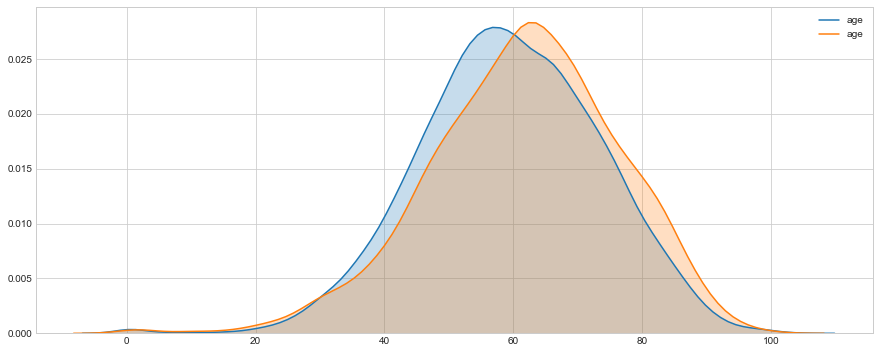

In [19]:
sns.kdeplot(men_deceased_age, shade=True)
sns.kdeplot(women_deceased_age, shade=True)

## Is the age of death different for Women and Men?

In [20]:
# T test for independent samples, to see if the two distributions are the same
from scipy.stats import ttest_ind

_, pv = ttest_ind(men_deceased_age, women_deceased_age)

if pv < 0.01:
    print(f'The two samples are distinct, alpha = {pv}')
else:
    print('There is not difference between samples')

difference_between_samples = round(Covid.cohens_d(men_deceased_age, women_deceased_age),2)

print(f'Men are {difference_between_samples} stds away from Women')


The two samples are distinct, alpha = 1.4029509393427522e-16
Men are -0.16 stds away from Women


## Men and Women active infections

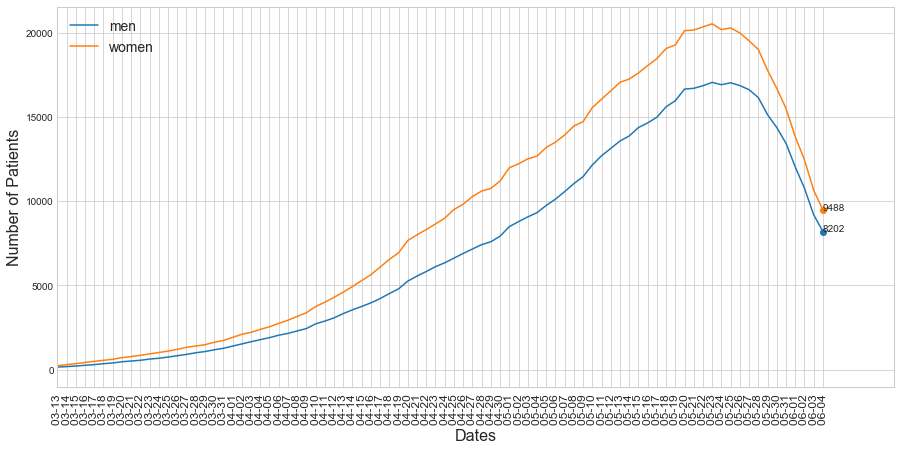

In [21]:
men_active   = Covid('all').patients().women().actives()
women_active = Covid('all').patients().men().actives()

Covid.plot_actives(data  = [men_active, women_active],
                   names = ['men','women'],
                   trim = 60)

## Different in illness for Infected Men and Women

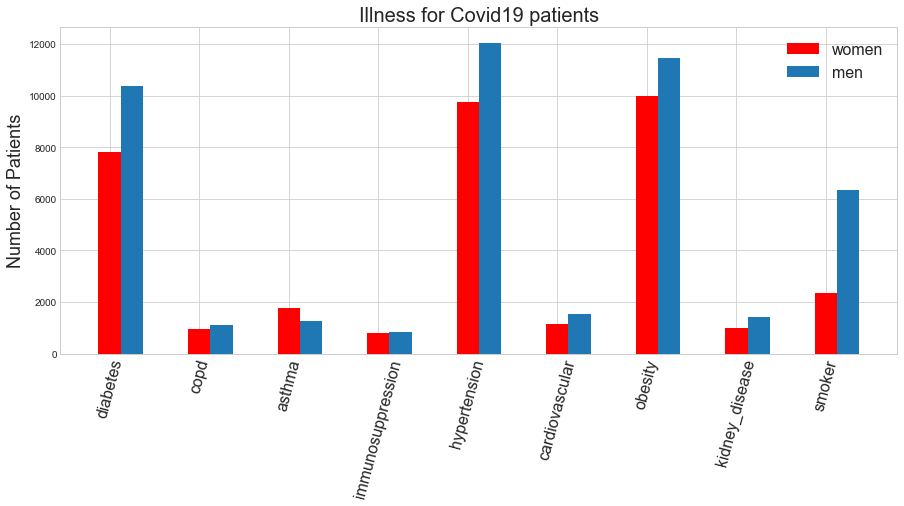

In [22]:
men_infected_illness = Covid('all').patients().men().infected().illness().drop(['sex','age'],axis=1)
women_infected_illness = Covid('all').patients().women().infected().illness().drop(['sex','age'],axis=1)

plt.close('all')
plt.rcParams["figure.figsize"] = (15,6)

plt.bar(list(women_infected_illness.keys()), [sum(women_infected_illness[x]) for x in women_infected_illness.keys()], color='r',width = 0.25, label='women')
plt.bar([x + 0.25 for x in range(9)], [sum(men_infected_illness[x]) for x in men_infected_illness.keys()],width = 0.25, label='men')

plt.xticks(fontsize = 16, rotation= 75)
plt.legend(fontsize=16)
plt.ylabel('Number of Patients', fontsize=18)
plt.title('Illness for Covid19 patients', fontsize=20)
plt.show()

## Difference in illness between dead and alive Covid19 Patients

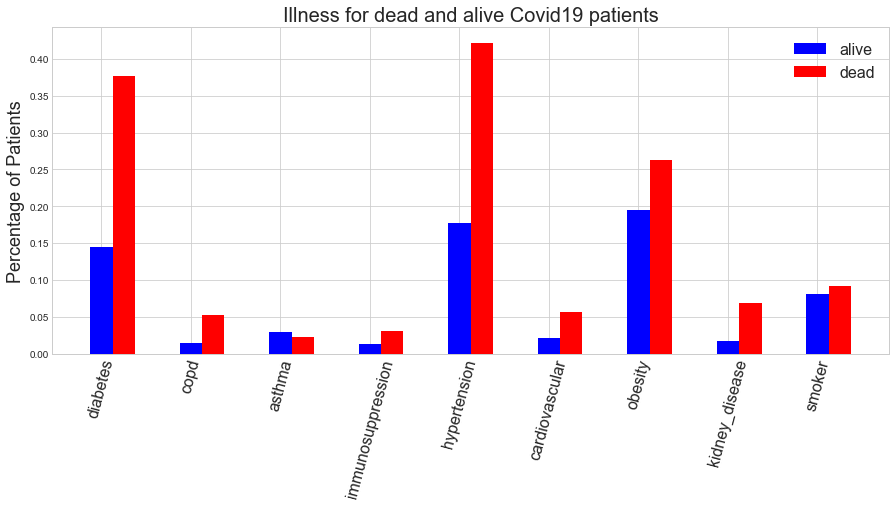

In [23]:
alive_illness = Covid('all').patients().infected().alive().illness().drop(['sex','age'],axis=1)
death_illness = Covid('all').patients().infected().deaths().illness().drop(['sex','age'],axis=1)
total_alive = len(alive_illness)
total_deaths = len(death_illness)

plt.close('all')
plt.rcParams["figure.figsize"] = (15,6)

plt.bar(list(alive_illness.keys()), [sum(alive_illness[x])/total_alive for x in alive_illness.keys()], color='b',width = 0.25, label='alive')
plt.bar([x + 0.25 for x in range(9)], [sum(death_illness[x])/total_deaths for x in death_illness.keys()], color = 'r',width = 0.25, label='dead')

plt.xticks(fontsize = 16, rotation= 75)
plt.legend(fontsize=16)
plt.ylabel('Percentage of Patients', fontsize=18)
plt.title('Illness for dead and alive Covid19 patients', fontsize=20)
plt.show()

## Illness for Dead patients younger than 40

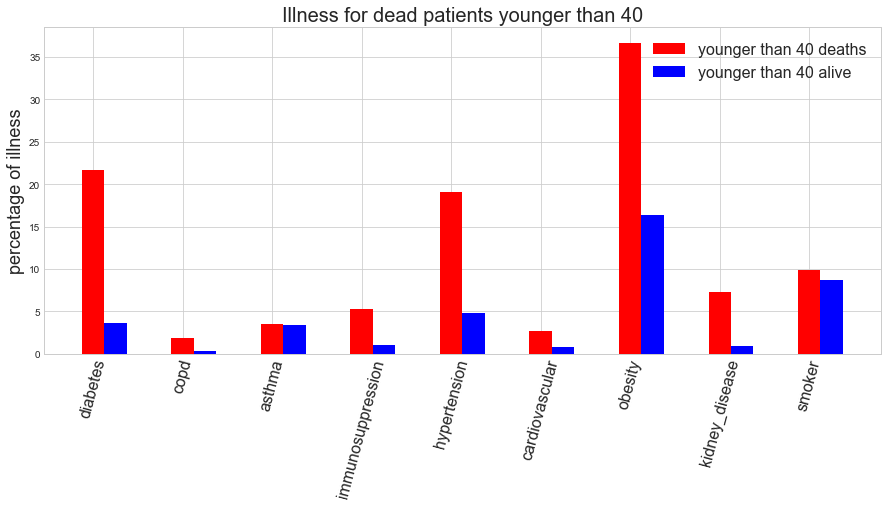

In [24]:
younger_than_40 = Covid('all').patients().deaths().infected().age(start = 0,end = 40).illness().drop(['sex','age'],axis=1)
alive_younger_than_40 = Covid('all').patients().alive().infected().age(start = 0,end = 40).illness().drop(['sex','age'],axis=1)

plt.close('all')
plt.rcParams["figure.figsize"] = (15,6)

plt.bar(list(younger_than_40.keys()), [sum(younger_than_40[x])/len(younger_than_40)*100 for x in younger_than_40.keys()],color = 'r', width = 0.25, label='younger than 40 deaths')
plt.bar([x + 0.25 for x in range(9)], [sum(alive_younger_than_40[x])/len(alive_younger_than_40)*100 for x in alive_younger_than_40.keys()], color = 'b',width = 0.25, label='younger than 40 alive')

plt.xticks(fontsize = 16, rotation= 75)
plt.legend(fontsize=16)
plt.ylabel('percentage of illness', fontsize=18)
plt.title('Illness for dead patients younger than 40', fontsize=20)
plt.show()

## Men and Women actives for every state, max to min

In [25]:
Covid.get_max_to_min('actives')

OrderedDict([('DISTRITO FEDERAL', 3829),
             ('MEXICO', 2324),
             ('TABASCO', 971),
             ('GUANAJUATO', 869),
             ('JALISCO', 843),
             ('PUEBLA', 747),
             ('VERACRUZ', 689),
             ('CHIAPAS', 603),
             ('SINALOA', 566),
             ('BAJA CALIFORNIA', 556),
             ('SONORA', 492),
             ('HIDALGO', 473),
             ('NUEVO LEON', 432),
             ('OAXACA', 421),
             ('MICHOACAN', 398),
             ('YUCATAN', 364),
             ('TAMAULIPAS', 313),
             ('AGUASCALIENTES', 309),
             ('SAN LUIS POTOSI', 299),
             ('QUINTANA ROO', 282),
             ('COAHUILA', 257),
             ('MORELOS', 230),
             ('QUERETARO', 210),
             ('TLAXCALA', 205),
             ('DURANGO', 194),
             ('NAYARIT', 194),
             ('GUERRERO', 174),
             ('CAMPECHE', 131),
             ('BAJA CALIFORNIA SUR', 118),
             ('CHIHUAHUA', 82),
    

# State by State

# Mexico City:

### Confirmed, Suspicious and deaths

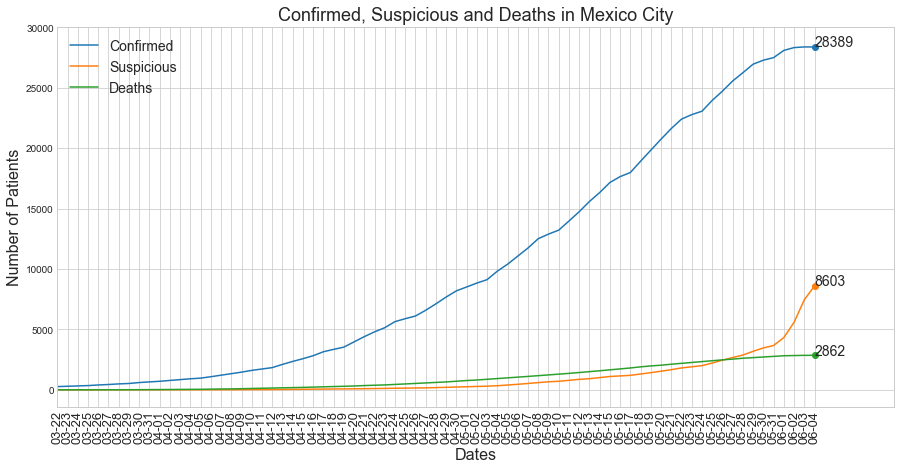

In [26]:
cdmx_confirmed = Covid('cdmx').cummulative('confirmed')
cdmx_suspicious= Covid('cdmx').cummulative('suspicious')
cdmx_deaths    = Covid('cdmx').cummulative('deaths')
Covid.plot_cummulative(data = [cdmx_confirmed,
                               cdmx_suspicious,
                               cdmx_deaths],
                    names = ['Confirmed','Suspicious','Deaths'],
                    trim = 70,
                    title = 'Confirmed, Suspicious and Deaths in Mexico City')

### Actives:

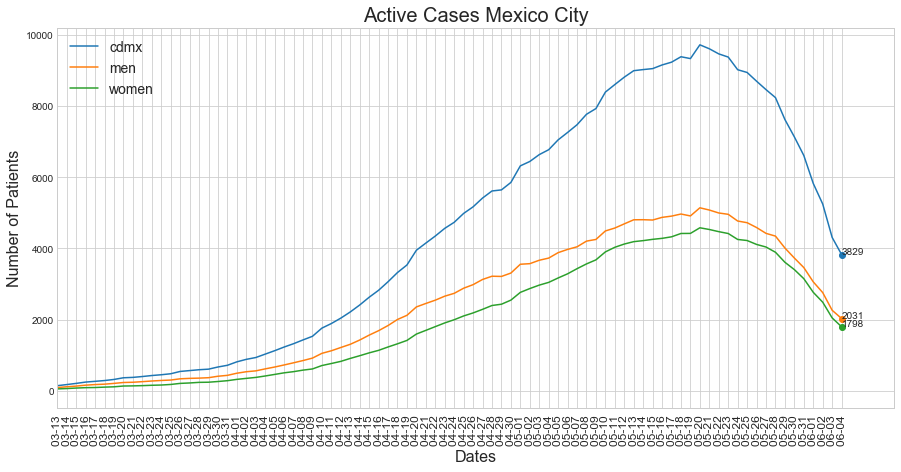

In [27]:
cdmx_actives = Covid('cdmx').patients().actives()
cdmx_men_active   = Covid('cdmx').patients().men().actives()
cdmx_women_active = Covid('cdmx').patients().women().actives()

Covid.plot_actives(data  = [cdmx_actives,
                            cdmx_men_active,
                            cdmx_women_active],
                   names = ['cdmx','men','women'],
                   trim = 20,
                   title= 'Active Cases Mexico City')

# Mexico State

### Confirmed, Suspicious and deaths

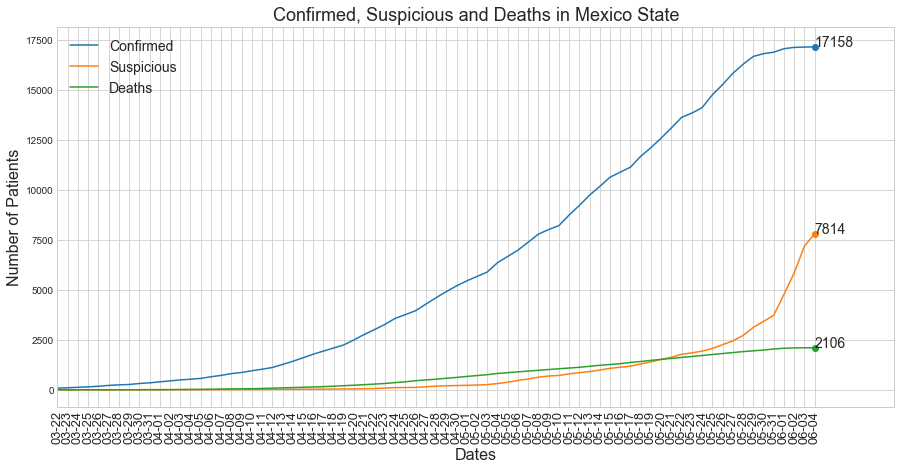

In [60]:
mexico_state_confirmed = Covid('MEXICO').cummulative('confirmed')
mexico_state_suspicious= Covid('MEXICO').cummulative('suspicious')
mexico_state_deaths    = Covid('MEXICO').cummulative('deaths')
Covid.plot_cummulative(data = [mexico_state_confirmed,
                               mexico_state_suspicious,
                               mexico_state_deaths],
                    names = ['Confirmed','Suspicious','Deaths'],
                    trim = 70,
                    title = 'Confirmed, Suspicious and Deaths in Mexico State')

### Actives:

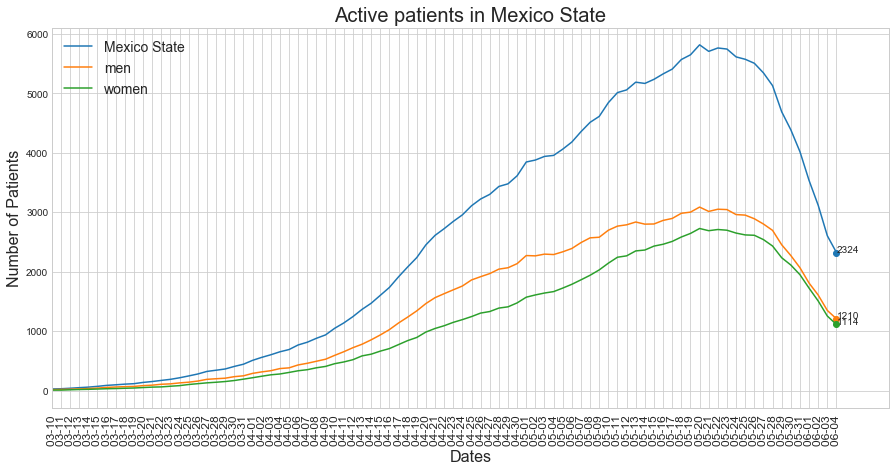

In [61]:
mexico_state_active       = Covid('MEXICO').patients().actives()
mexico_state_men_active   = Covid('MEXICO').patients().men().actives()
mexico_state_women_active = Covid('MEXICO').patients().women().actives()

Covid.plot_actives(data  = [mexico_state_active,
                            mexico_state_men_active,
                            mexico_state_women_active],
                   names = ['Mexico State','men','women'],
                   trim = 20,
                   title = 'Active patients in Mexico State')

# Tabasco

### Confirmed, Suspicious and deaths

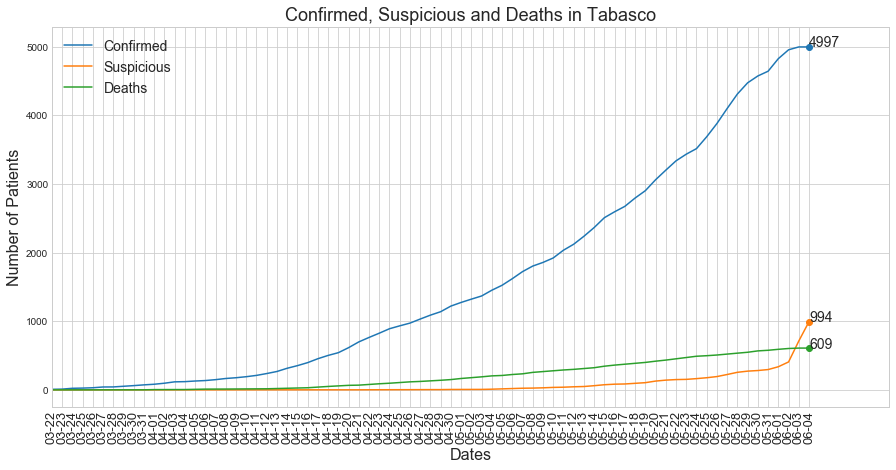

In [62]:
tabasco_confirmed = Covid('TABASCO').cummulative('confirmed')
tabasco_suspicious= Covid('TABASCO').cummulative('suspicious')
tabasco_deaths    = Covid('TABASCO').cummulative('deaths')
Covid.plot_cummulative(data = [tabasco_confirmed,
                               tabasco_suspicious,
                               tabasco_deaths],
                    names = ['Confirmed','Suspicious','Deaths'],
                    trim = 70,
                    title = 'Confirmed, Suspicious and Deaths in Tabasco')

## Actives

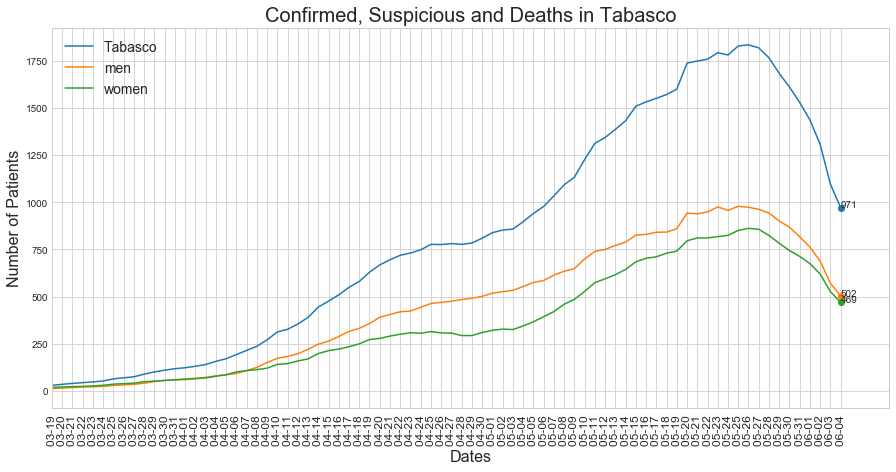

In [63]:
tabasco_active       = Covid('TABASCO').patients().actives()
tabasco_men_active   = Covid('TABASCO').patients().men().actives()
tabasco_women_active = Covid('TABASCO').patients().women().actives()

Covid.plot_actives(data  = [tabasco_active,
                            tabasco_men_active,
                            tabasco_women_active],
                   names = ['Tabasco','men','women'],
                   trim = 10,
                   title = 'Confirmed, Suspicious and Deaths in Tabasco')

## Guanajuato

### Confirmed, Suspicious and deaths

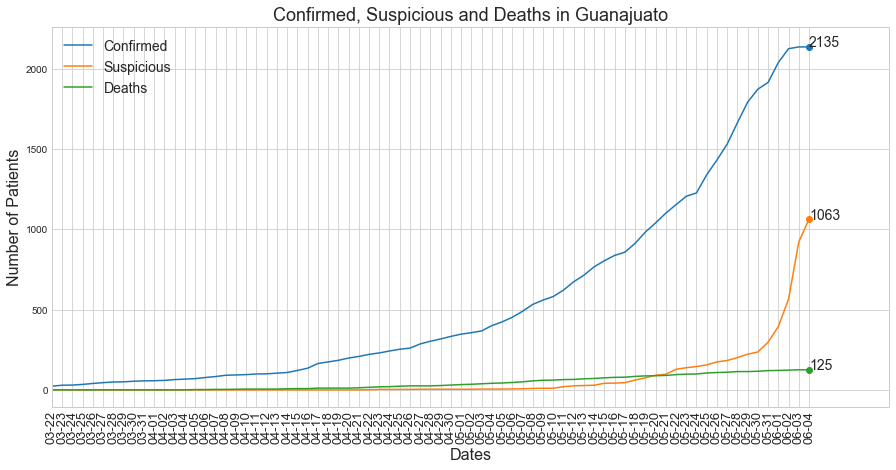

In [64]:
guanajuato_confirmed = Covid('GUANAJUATO').cummulative('confirmed')
guanajuato_suspicious= Covid('GUANAJUATO').cummulative('suspicious')
guanajuato_deaths    = Covid('GUANAJUATO').cummulative('deaths')
Covid.plot_cummulative(data = [guanajuato_confirmed,
                               guanajuato_suspicious,
                               guanajuato_deaths],
                    names = ['Confirmed','Suspicious','Deaths'],
                    trim = 70,
                    title = 'Confirmed, Suspicious and Deaths in Guanajuato')

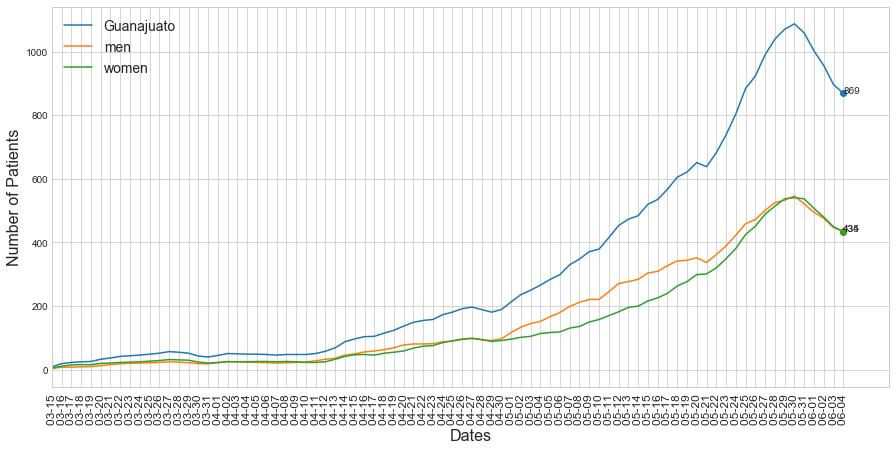

In [31]:
guanajuato_active       = Covid('GUANAJUATO').patients().actives()
guanajuato_men_active   = Covid('GUANAJUATO').patients().men().actives()
guanajuato_women_active = Covid('GUANAJUATO').patients().women().actives()

Covid.plot_actives(data  = [guanajuato_active,
                            guanajuato_men_active,
                            guanajuato_women_active],
                   names = ['Guanajuato','men','women'],
                   trim = 5)

## Jalisco

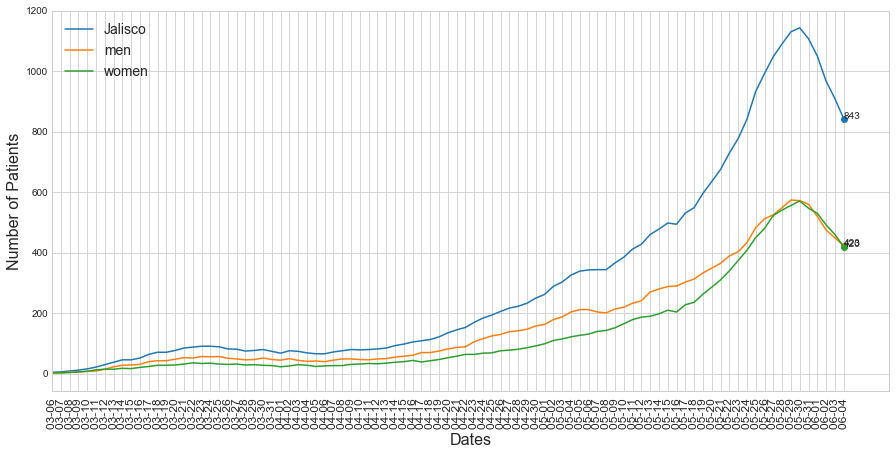

In [32]:
jalisco_active       = Covid('JALISCO').patients().actives()
jalisco_men_active   = Covid('JALISCO').patients().men().actives()
jalisco_women_active = Covid('JALISCO').patients().women().actives()

Covid.plot_actives(data  = [jalisco_active,
                            jalisco_men_active,
                            jalisco_women_active],
                   names = ['Jalisco','men','women'],
                   trim = 5)

## Puebla

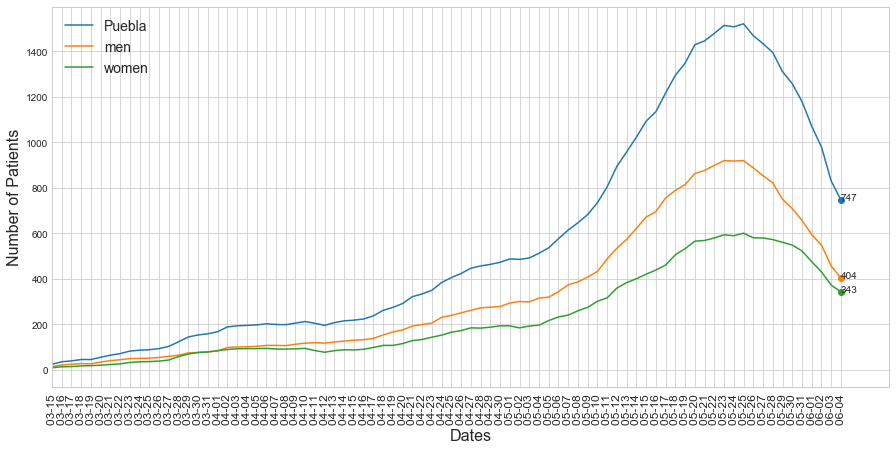

In [33]:
puebla_active   = Covid('PUEBLA').patients().actives()
puebla_men_active   = Covid('PUEBLA').patients().men().actives()
puebla_women_active = Covid('PUEBLA').patients().women().actives()

Covid.plot_actives(data  = [puebla_active,
                            puebla_men_active,
                            puebla_women_active],
                   names = ['Puebla','men','women'],
                   trim = 10)

## Veracruz

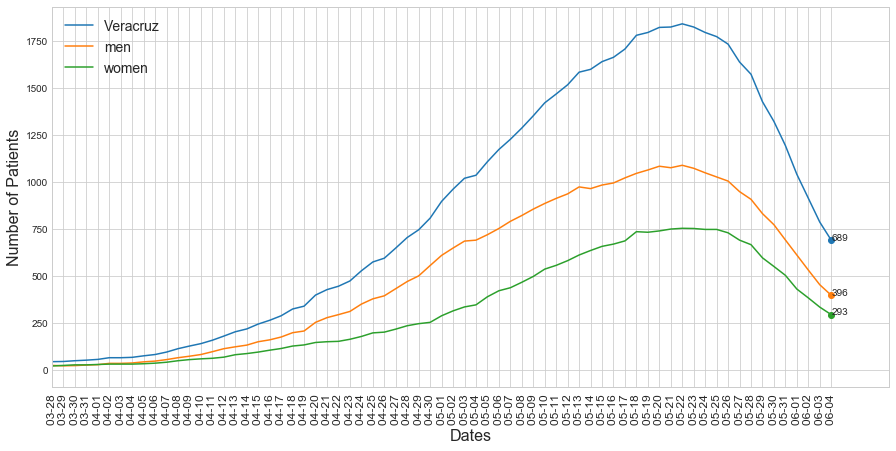

In [34]:
veracruz_active   = Covid('VERACRUZ').patients().actives()
veracruz_men_active   = Covid('VERACRUZ').patients().men().actives()
veracruz_women_active = Covid('VERACRUZ').patients().women().actives()

Covid.plot_actives(data  = [veracruz_active,
                            veracruz_men_active,
                            veracruz_women_active],
                   names = ['Veracruz','men','women'],
                   trim = 25)

## Chiapas

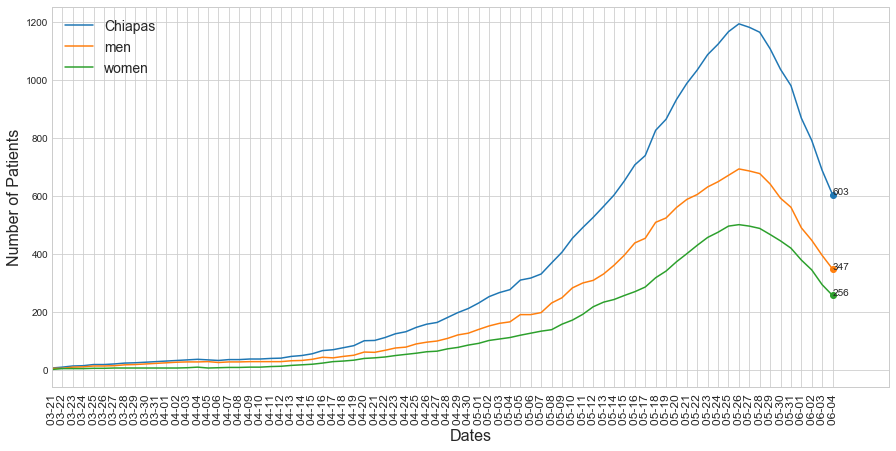

In [35]:
chiapas_active   = Covid('CHIAPAS').patients().actives()
chiapas_men_active   = Covid('CHIAPAS').patients().men().actives()
chiapas_women_active = Covid('CHIAPAS').patients().women().actives()

Covid.plot_actives(data  = [chiapas_active,
                            chiapas_men_active,
                            chiapas_women_active],
                   names = ['Chiapas','men','women'],
                   trim = 25)

## Sinaloa

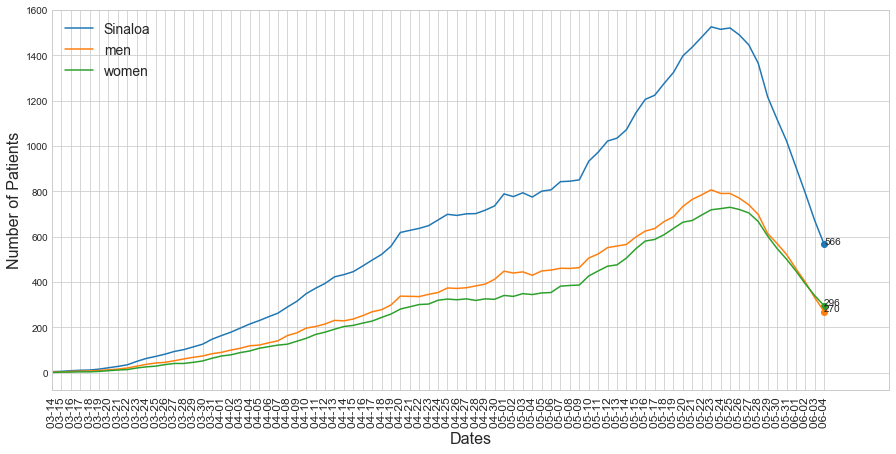

In [36]:
sinaloa_active       = Covid('SINALOA').patients().actives()
sinaloa_men_active   = Covid('SINALOA').patients().men().actives()
sinaloa_women_active = Covid('SINALOA').patients().women().actives()

Covid.plot_actives(data  = [sinaloa_active,
                            sinaloa_men_active,
                            sinaloa_women_active],
                   names = ['Sinaloa','men','women'],
                   trim = 45)

## Baja California

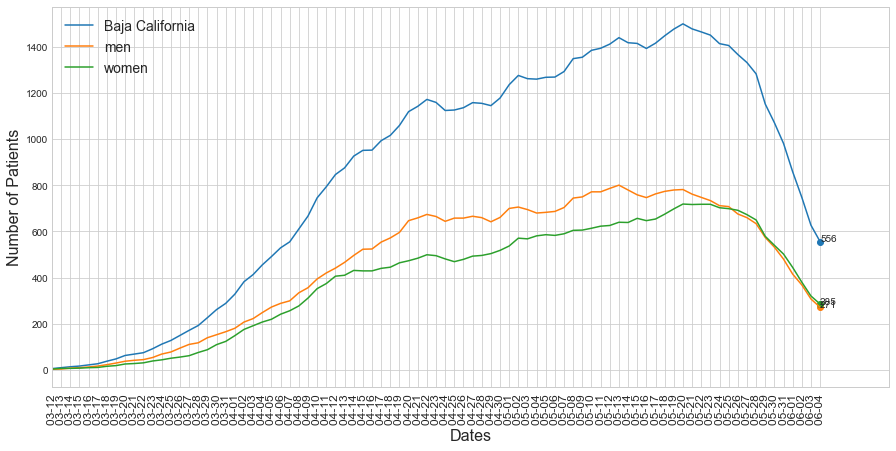

In [37]:
bcalifornia_active   = Covid('BAJA CALIFORNIA').patients().actives()
bcalifornia_men_active   = Covid('BAJA CALIFORNIA').patients().men().actives()
bcalifornia_women_active = Covid('BAJA CALIFORNIA').patients().women().actives()

Covid.plot_actives(data  = [bcalifornia_active,
                            bcalifornia_men_active,
                            bcalifornia_women_active],
                   names = ['Baja California','men','women'],
                   trim = 55)

## Sonora

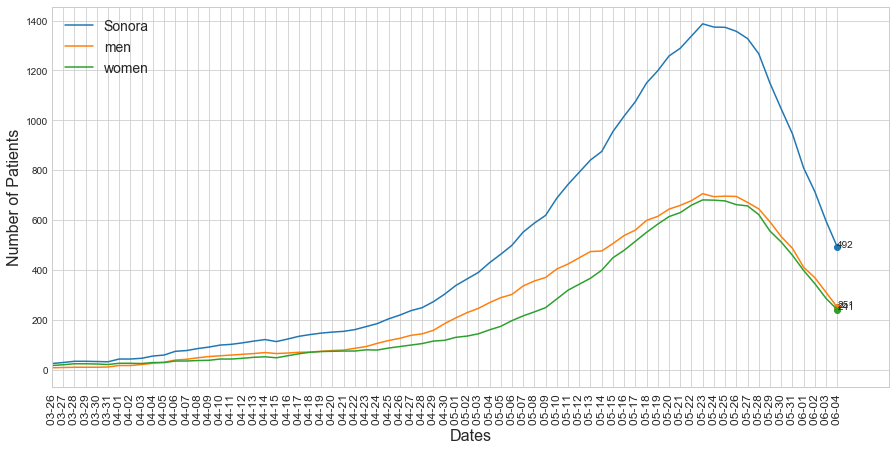

In [38]:
sonora_active   = Covid('SONORA').patients().actives()
sonora_men_active   = Covid('SONORA').patients().men().actives()
sonora_women_active = Covid('SONORA').patients().women().actives()

Covid.plot_actives(data  = [sonora_active,
                            sonora_men_active,
                            sonora_women_active],
                   names = ['Sonora','men','women'],
                   trim = 15)

## Hidalgo

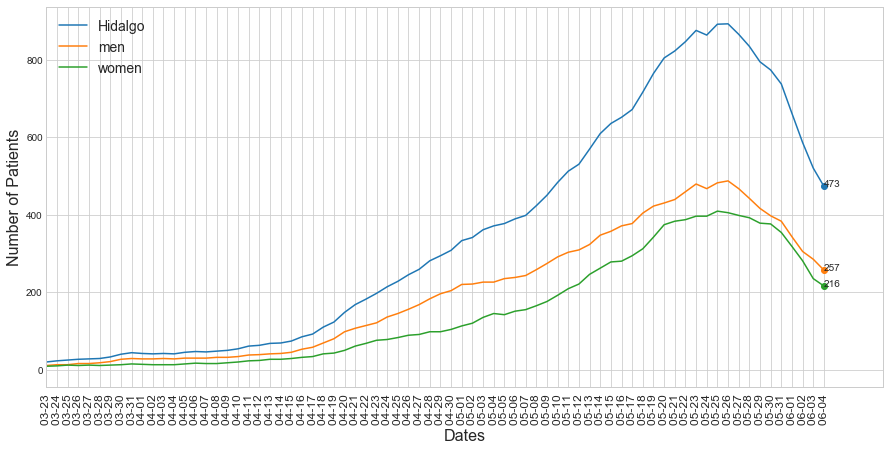

In [39]:
hidalgo_active   = Covid('HIDALGO').patients().actives()

hidalgo_men_active   = Covid('HIDALGO').patients().men().actives()
hidalgo_women_active = Covid('HIDALGO').patients().women().actives()

Covid.plot_actives(data  = [hidalgo_active,
                            hidalgo_men_active,
                            hidalgo_women_active],
                   names = ['Hidalgo','men','women'],
                   trim = 30)

## Nuevo León

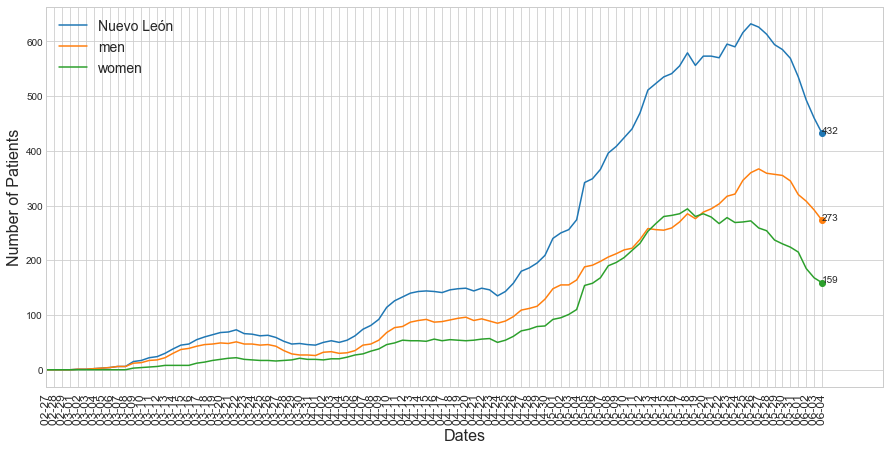

In [40]:
nleon_active   = Covid('NUEVO LEON').patients().actives()

nleon_men_active   = Covid('NUEVO LEON').patients().men().actives()
nleon_women_active = Covid('NUEVO LEON').patients().women().actives()

Covid.plot_actives(data  = [nleon_active,
                            nleon_men_active,
                            nleon_women_active],
                   names = ['Nuevo León','men','women'],
                   trim = 45)

## Oaxaca

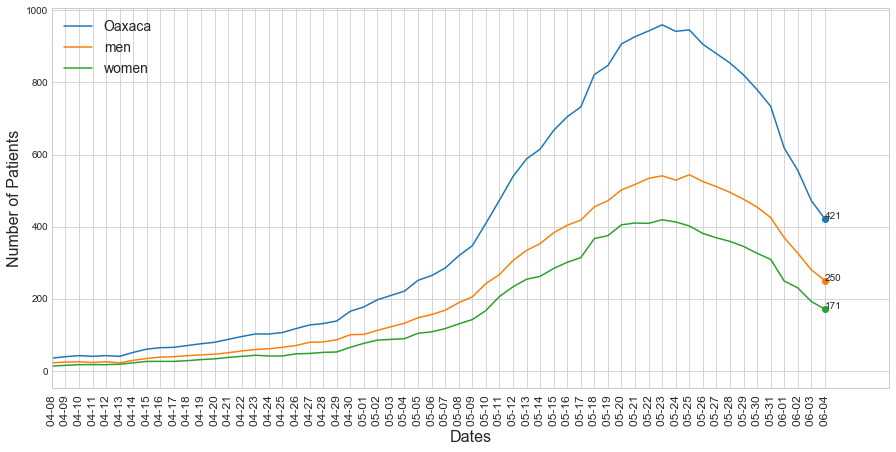

In [41]:
oaxaca_active   = Covid('OAXACA').patients().actives()

oaxaca_men_active   = Covid('OAXACA').patients().men().actives()
oaxaca_women_active = Covid('OAXACA').patients().women().actives()

Covid.plot_actives(data  = [oaxaca_active,
                            oaxaca_men_active,
                            oaxaca_women_active],
                   names = ['Oaxaca','men','women'],
                   trim = 30)

## Michoacan

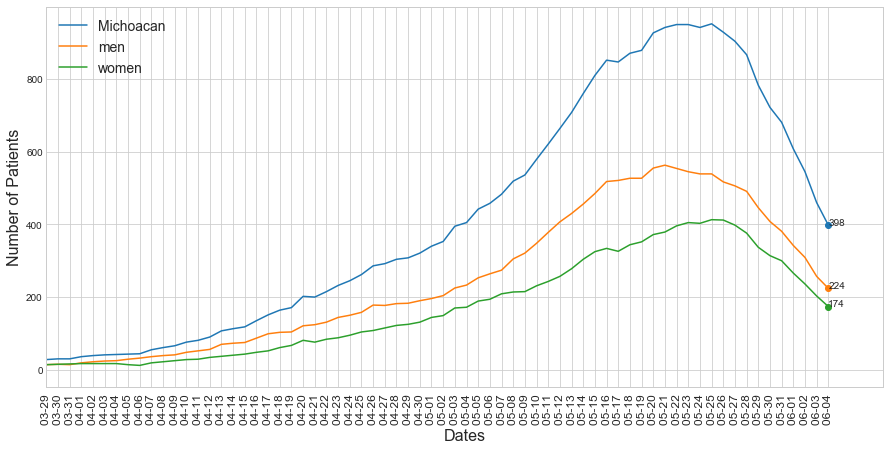

In [42]:
michoacan_active   = Covid('MICHOACAN').patients().actives()

michoacan_men_active   = Covid('MICHOACAN').patients().men().actives()
michoacan_women_active = Covid('MICHOACAN').patients().women().actives()

Covid.plot_actives(data  = [michoacan_active,
                            michoacan_men_active,
                            michoacan_women_active],
                   names = ['Michoacan','men','women'],
                   trim = 20)

## Yucatan

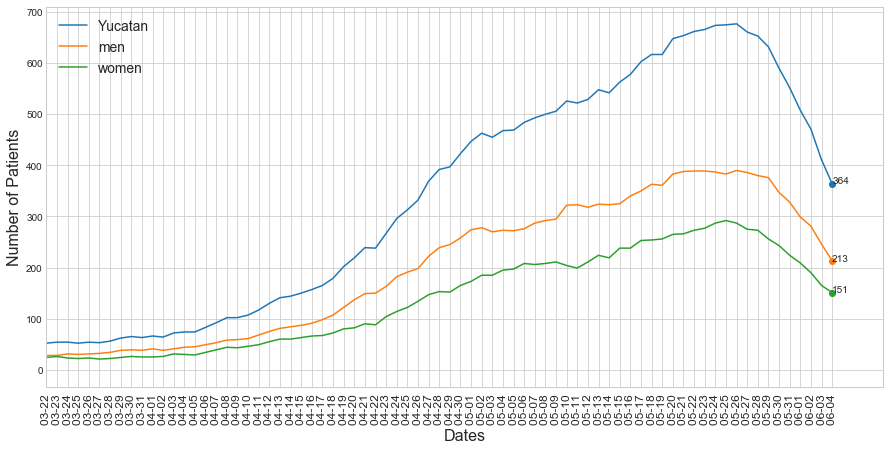

In [43]:
yucatan_active   = Covid('YUCATAN').patients().actives()

yucatan_men_active   = Covid('YUCATAN').patients().men().actives()
yucatan_women_active = Covid('YUCATAN').patients().women().actives()

Covid.plot_actives(data  = [yucatan_active,
                            yucatan_men_active,
                            yucatan_women_active],
                   names = ['Yucatan','men','women'],
                   trim = 15)

## Tamaulipas

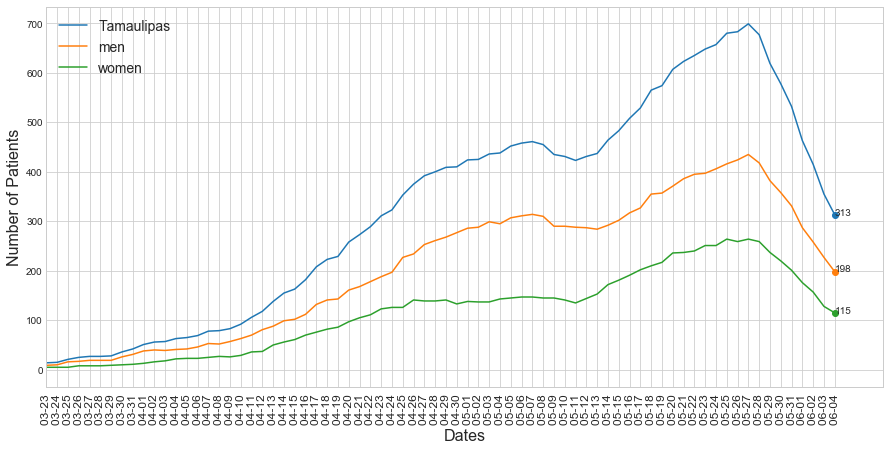

In [44]:
tamaulipas_active   = Covid('TAMAULIPAS').patients().actives()

tamaulipas_men_active   = Covid('TAMAULIPAS').patients().men().actives()
tamaulipas_women_active = Covid('TAMAULIPAS').patients().women().actives()

Covid.plot_actives(data  = [tamaulipas_active,
                            tamaulipas_men_active,
                            tamaulipas_women_active],
                   names = ['Tamaulipas','men','women'],
                   trim = 10)

## Aguascalientes

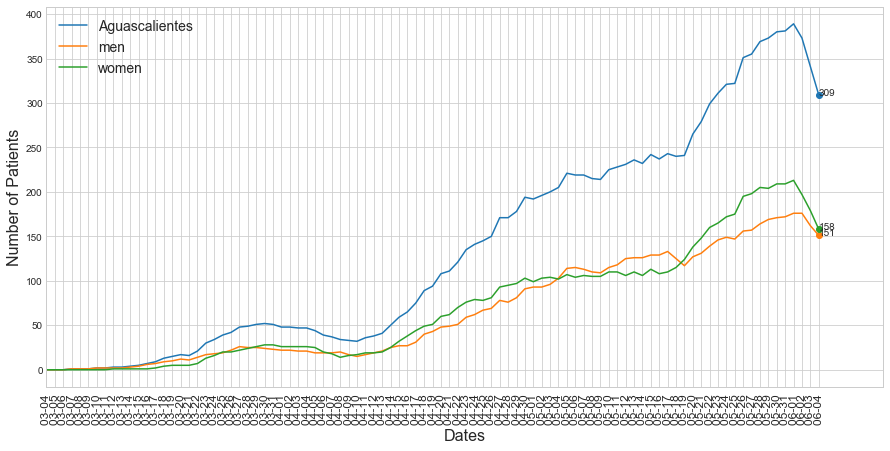

In [45]:
aguascalientes_active   = Covid('AGUASCALIENTES').patients().actives()

aguascalientes_men_active   = Covid('AGUASCALIENTES').patients().men().actives()
aguascalientes_women_active = Covid('AGUASCALIENTES').patients().women().actives()

Covid.plot_actives(data  = [aguascalientes_active,
                            aguascalientes_men_active,
                            aguascalientes_women_active],
                   names = ['Aguascalientes','men','women'],
                   trim = 50)

## San Luis Potosí

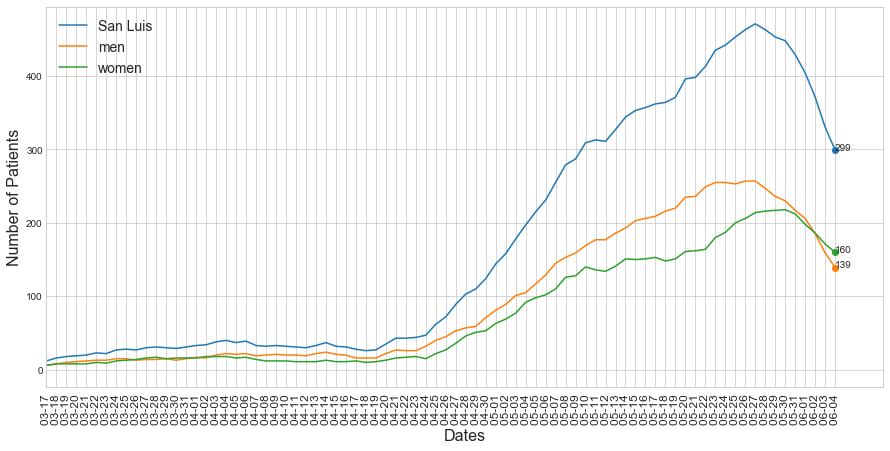

In [46]:
sanluis_active   = Covid('SAN LUIS POTOSI').patients().actives()

sanluis_men_active   = Covid('SAN LUIS POTOSI').patients().men().actives()
sanluis_women_active = Covid('SAN LUIS POTOSI').patients().women().actives()

Covid.plot_actives(data  = [sanluis_active,
                            sanluis_men_active,
                            sanluis_women_active],
                   names = ['San Luis','men','women'],
                   trim = 10)

## Quintana Roo

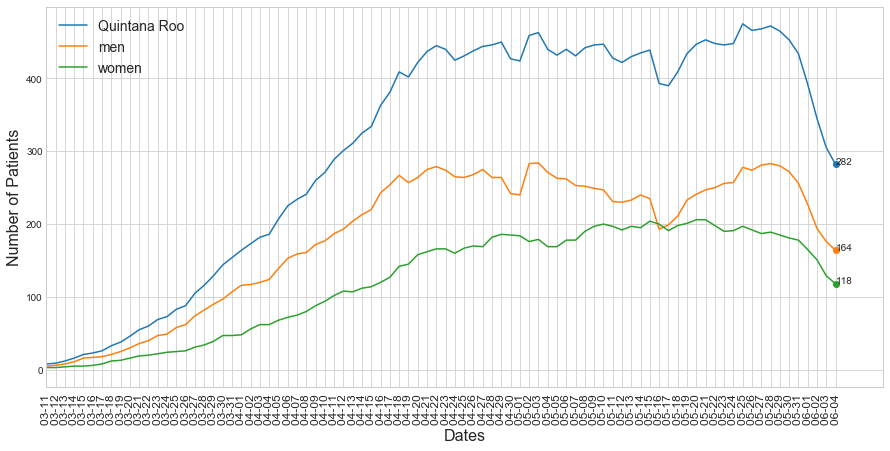

In [47]:
quintana_active   = Covid('QUINTANA ROO').patients().actives()

quintana_men_active   = Covid('QUINTANA ROO').patients().men().actives()
quintana_women_active = Covid('QUINTANA ROO').patients().women().actives()

Covid.plot_actives(data  = [quintana_active,
                            quintana_men_active,
                            quintana_women_active],
                   names = ['Quintana Roo','men','women'],
                   trim = 10)

## Coahuila

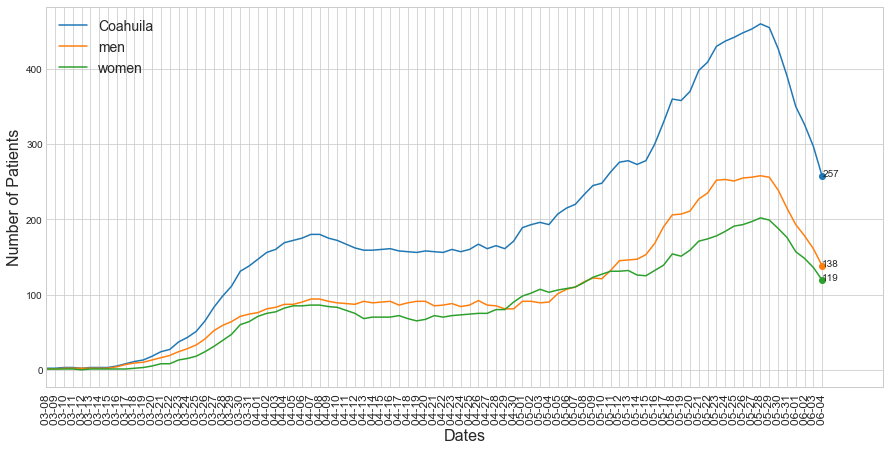

In [48]:
coahuila_active   = Covid('COAHUILA').patients().actives()

coahuila_men_active   = Covid('COAHUILA').patients().men().actives()
coahuila_women_active = Covid('COAHUILA').patients().women().actives()

Covid.plot_actives(data  = [coahuila_active,
                            coahuila_men_active,
                            coahuila_women_active],
                   names = ['Coahuila','men','women'],
                   trim = 40)

## Morelos

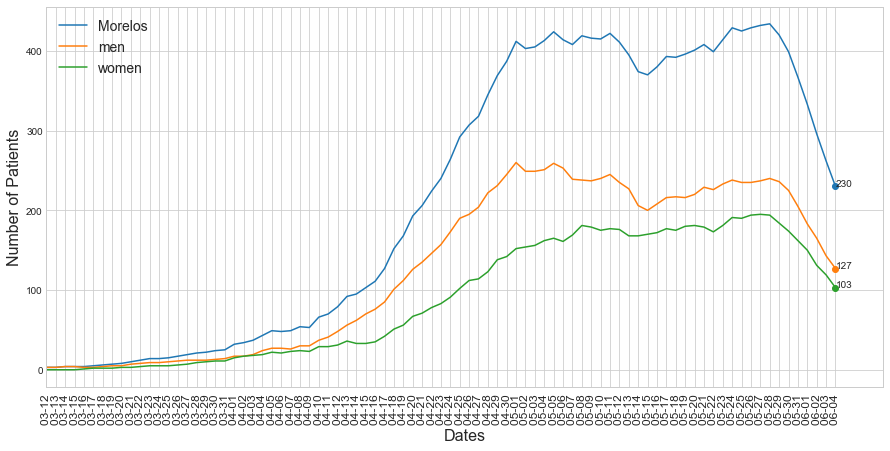

In [49]:
morelos_active   = Covid('MORELOS').patients().actives()

morelos_men_active   = Covid('MORELOS').patients().men().actives()
morelos_women_active = Covid('MORELOS').patients().women().actives()

Covid.plot_actives(data  = [morelos_active,
                            morelos_men_active,
                            morelos_women_active],
                   names = ['Morelos','men','women'],
                   trim = 10)

## Queretaro

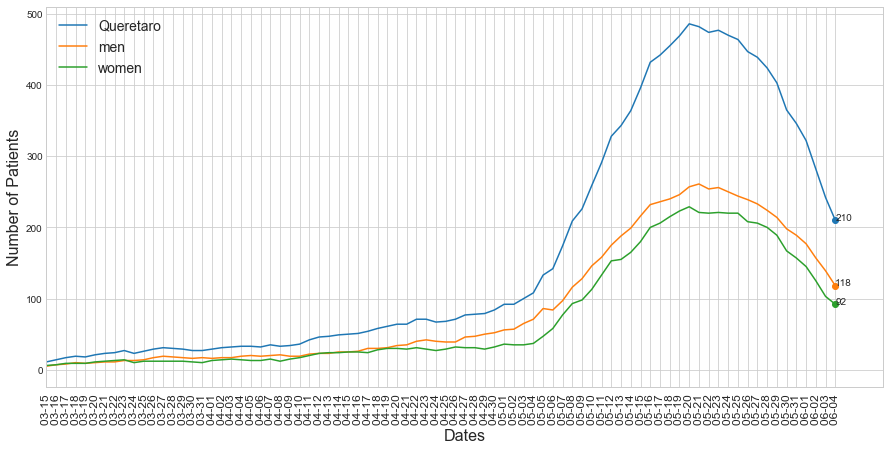

In [50]:
queretaro_active   = Covid('QUERETARO').patients().actives()

queretaro_men_active   = Covid('QUERETARO').patients().men().actives()
queretaro_women_active = Covid('QUERETARO').patients().women().actives()

Covid.plot_actives(data  = [queretaro_active,
                            queretaro_men_active,
                            queretaro_women_active],
                   names = ['Queretaro','men','women'],
                   trim = 10)

## Tlaxcala

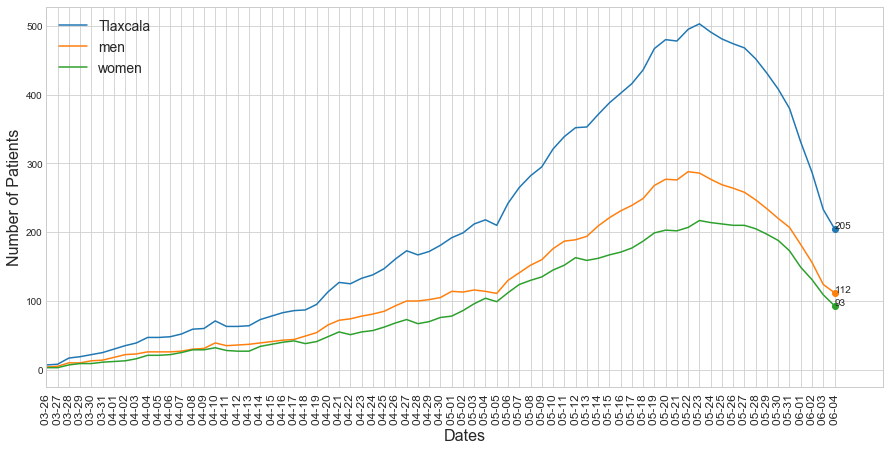

In [51]:
tlaxcala_active   = Covid('TLAXCALA').patients().actives()

tlaxcala_men_active   = Covid('TLAXCALA').patients().men().actives()
tlaxcala_women_active = Covid('TLAXCALA').patients().women().actives()

Covid.plot_actives(data  = [tlaxcala_active,
                            tlaxcala_men_active,
                            tlaxcala_women_active],
                   names = ['Tlaxcala','men','women'],
                   trim = 10)

## Durango

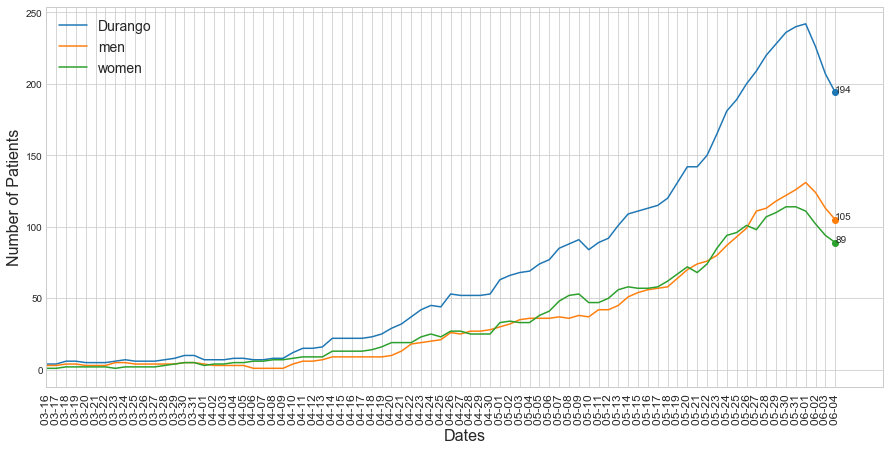

In [52]:
durango_active   = Covid('DURANGO').patients().actives()

durango_men_active   = Covid('DURANGO').patients().men().actives()
durango_women_active = Covid('DURANGO').patients().women().actives()

Covid.plot_actives(data  = [durango_active,
                            durango_men_active,
                            durango_women_active],
                   names = ['Durango','men','women'],
                   trim = 10)

## Nayarit

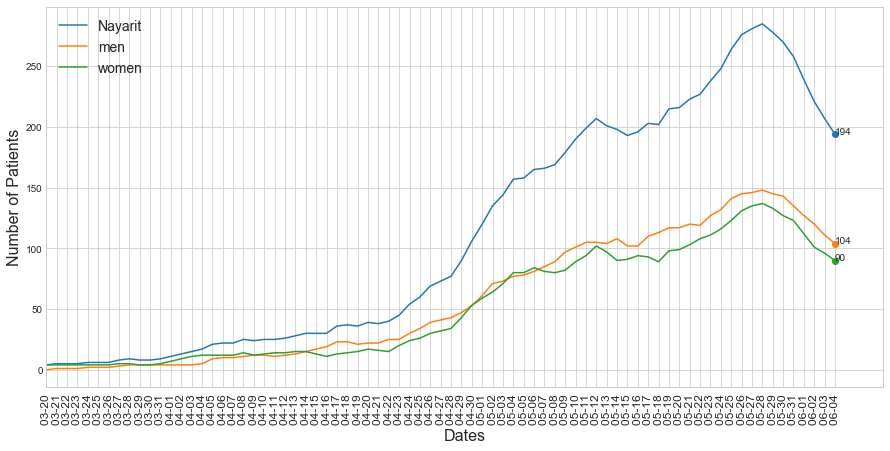

In [53]:
nayarit_active   = Covid('NAYARIT').patients().actives()

nayarit_men_active   = Covid('NAYARIT').patients().men().actives()
nayarit_women_active = Covid('NAYARIT').patients().women().actives()

Covid.plot_actives(data  = [nayarit_active,
                            nayarit_men_active,
                            nayarit_women_active],
                   names = ['Nayarit','men','women'],
                   trim = 10)

## Guerrero

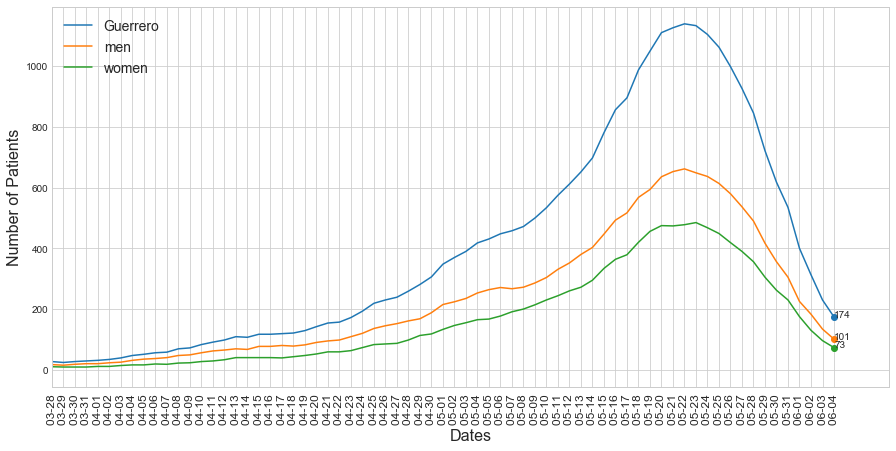

In [54]:
guerrero_active   = Covid('GUERRERO').patients().actives()

guerrero_men_active   = Covid('GUERRERO').patients().men().actives()
guerrero_women_active = Covid('GUERRERO').patients().women().actives()

Covid.plot_actives(data  = [guerrero_active,
                            guerrero_men_active,
                            guerrero_women_active],
                   names = ['Guerrero','men','women'],
                   trim = 20)

## Campeche

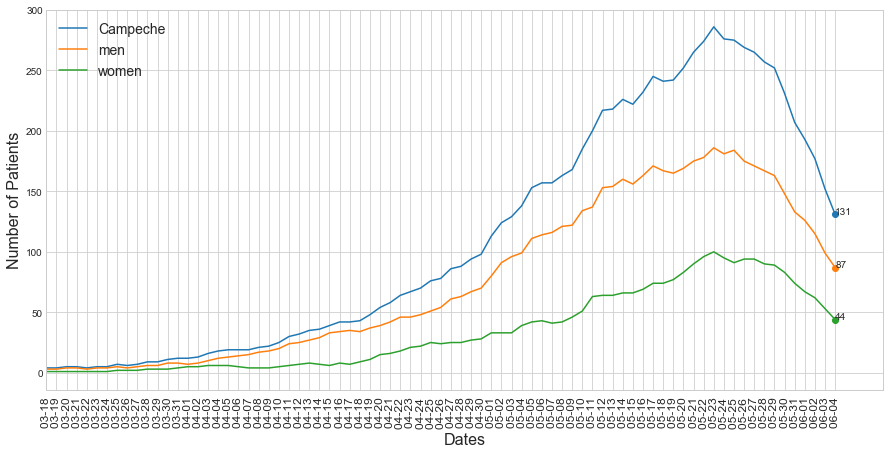

In [55]:
campeche_active   = Covid('CAMPECHE').patients().actives()

campeche_men_active   = Covid('CAMPECHE').patients().men().actives()
campeche_women_active = Covid('CAMPECHE').patients().women().actives()

Covid.plot_actives(data  = [campeche_active,
                            campeche_men_active,
                            campeche_women_active],
                   names = ['Campeche','men','women'],
                   trim = 10)

## Baja California Sur

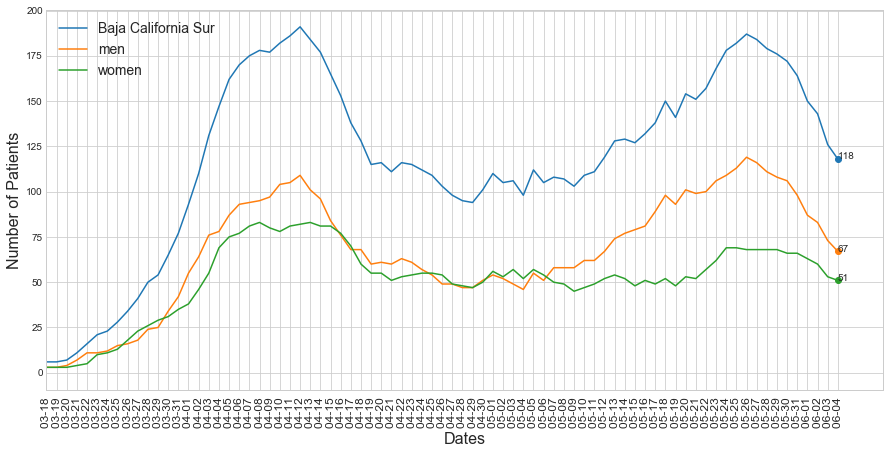

In [56]:
bcalifornia_sur_active   = Covid('BAJA CALIFORNIA SUR').patients().actives()

bcalifornia_sur_men_active   = Covid('BAJA CALIFORNIA SUR').patients().men().actives()
bcalifornia_sur_women_active = Covid('BAJA CALIFORNIA SUR').patients().women().actives()

Covid.plot_actives(data  = [bcalifornia_sur_active,
                            bcalifornia_sur_men_active,
                            bcalifornia_sur_women_active],
                   names = ['Baja California Sur','men','women'],
                   trim = 5)

## Chihuahua

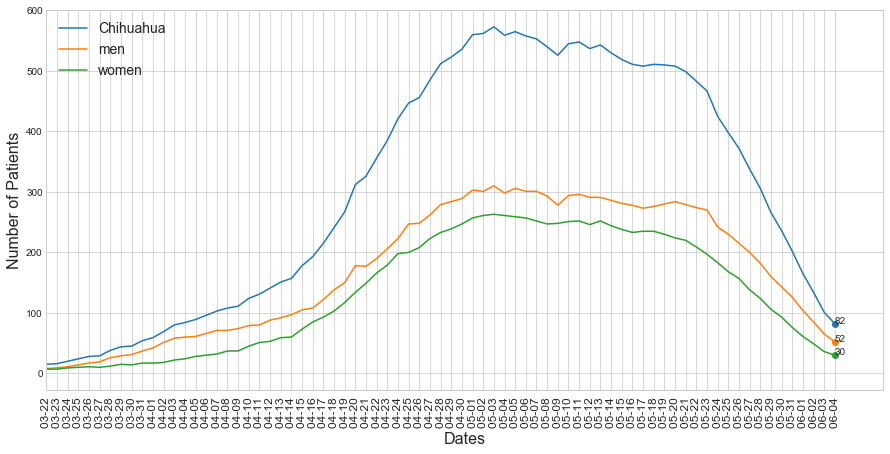

In [57]:
chihuahua_active   = Covid('CHIHUAHUA').patients().actives()

chihuahua_men_active   = Covid('CHIHUAHUA').patients().men().actives()
chihuahua_women_active = Covid('CHIHUAHUA').patients().women().actives()

Covid.plot_actives(data  = [chihuahua_active,
                            chihuahua_men_active,
                            chihuahua_women_active],
                   names = ['Chihuahua','men','women'],
                   trim = 10)

## Zacatecas

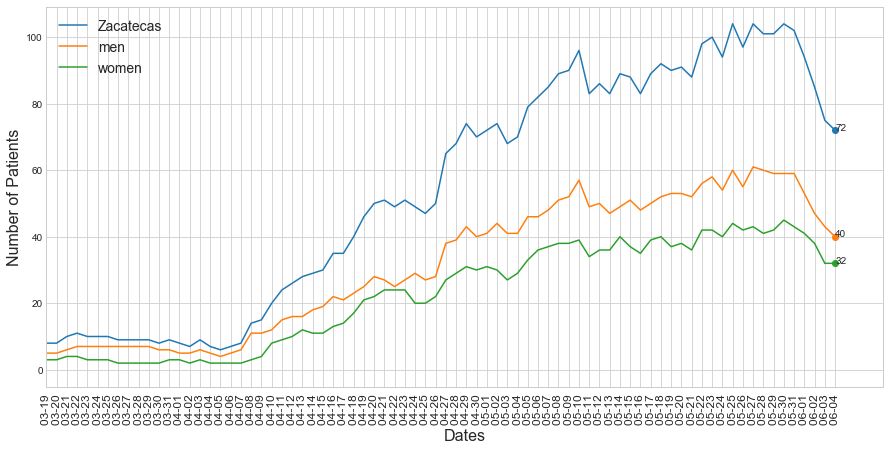

In [58]:
zacatecas_active   = Covid('ZACATECAS').patients().actives()

zacatecas_men_active   = Covid('ZACATECAS').patients().men().actives()
zacatecas_women_active = Covid('ZACATECAS').patients().women().actives()

Covid.plot_actives(data  = [zacatecas_active,
                            zacatecas_men_active,
                            zacatecas_women_active],
                   names = ['Zacatecas','men','women'],
                   trim = 10)

## Colima

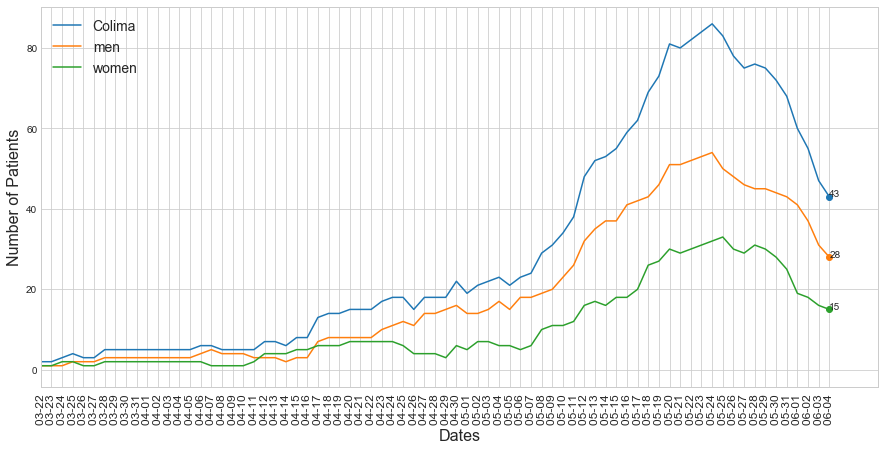

In [59]:
colima_active   = Covid('COLIMA').patients().actives()

colima_men_active   = Covid('COLIMA').patients().men().actives()
colima_women_active = Covid('COLIMA').patients().women().actives()

Covid.plot_actives(data  = [colima_active,
                            colima_men_active,
                            colima_women_active],
                   names = ['Colima','men','women'],
                   trim = 10)